# Replicate the hyperparameter sweeps visualizations for correct dpi and format jpeg

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
biolinkbert_file= pd.read_csv("../data/biolinkbert_sweep_for_parallel_coords_viz.csv")
bert_file = pd.read_csv("../data/bert_sweep_for_parallel_coords_viz.csv")
biobert_file = pd.read_csv("../data/biobert_sweep_for_parallel_coords_viz.csv")
bioroberta_file = pd.read_csv("../data/biomedroberta_sweep_for_parallel_coords_viz.csv")
biomegatron_file = pd.read_csv("../data/biomegatron_sweep_for_parallel_coords_viz.csv")
luke_file = pd.read_csv("../data/luke_sweep_for_parallel_coords_viz.csv")

In [91]:
biolinkbert_file

,Name,batch_size,lr,epoch,validation_loss_epoch,validation_f1_epoch
0,polar-sweep-12,64,0.00005,5,0.509618,0.871060
1,colorful-sweep-11,64,0.00003,7,0.514562,0.865840
2,breezy-sweep-10,64,0.00001,13,0.409651,0.888948
3,fresh-sweep-9,32,0.00005,6,0.458081,0.849301
4,valiant-sweep-8,32,0.00003,6,0.408183,0.863909
5,icy-sweep-7,32,0.00001,10,0.454863,0.858050
6,devout-sweep-6,16,0.00005,4,0.425549,0.884281
7,comfy-sweep-5,16,0.00003,7,0.506666,0.870066
8,ethereal-sweep-4,16,0.00001,7,0.413699,0.889285
9,misunderstood-sweep-3,10,0.00005,8,0.468588,0.849303


In [87]:
biolinkbert_file.dtypes

Name                      object
batch_size                 int64
lr                       float64
epoch                      int64
validation_loss_epoch    float64
validation_f1_epoch      float64
lr_str                    object
dtype: object

In [117]:
path = "../results/computers_in_biology_paper/hyperparameter_sweeps/"

def get_parallel_cords(sweep_data, image_name):
    fig = px.parallel_coordinates(sweep_data, color="validation_f1_epoch", 
                              labels={"validation_f1_epoch": "Validation F1-Score"
                                      ,"batch_size":"Batch size"
                                      ,"lr": "Learning rate"
                                      ,"epoch": "Epoch"
                                      ,"validation_loss_epoch":"Validation Loss"},
                               color_continuous_scale=px.colors.sequential.Viridis)
# Hide the color scale that is useless in this case
    fig.update_layout(
        coloraxis_colorbar=dict(title="")
    )
    fig.write_image(path+image_name, format="jpeg", scale=3.0)
    return(fig)


In [111]:
get_parallel_cords(biolinkbert_file,"biolinkbert_hyperparameter_sweep_parallel_coordinates_plot.jpg")

In [112]:
get_parallel_cords(bert_file,"bert_hyperparameter_sweep_parallel_coordinates_plot.jpg")

In [113]:
get_parallel_cords(biobert_file,"biobert_hyperparameter_sweep_parallel_coordinates_plot.jpg")

In [114]:
get_parallel_cords(bioroberta_file,"bioroberta_hyperparameter_sweep_parallel_coordinates_plot.jpg")

In [115]:
get_parallel_cords(biomegatron_file,"biomegatron_hyperparameter_sweep_parallel_coordinates_plot.jpg")

In [118]:
get_parallel_cords(luke_file,"luke_hyperparameter_sweep_parallel_coordinates_plot.jpg")

# Creating the confusion matrix 

In [119]:
conf_mat_data = pd.read_csv("../data/luke_best_model_confusion_matrix_data_during_evaluation_for_viz.csv")

In [120]:
conf_mat_data

,Actual,Predicted,_defaultColorIndex,id,nPredictions,name
0,activator,activator,3,7gzyvoli,104,luke_best_model
1,activator,no_relation,3,7gzyvoli,9,luke_best_model
2,activator,repressor,3,7gzyvoli,2,luke_best_model
3,activator,regulator,3,7gzyvoli,1,luke_best_model
4,no_relation,activator,3,7gzyvoli,7,luke_best_model
5,no_relation,no_relation,3,7gzyvoli,84,luke_best_model
6,no_relation,repressor,3,7gzyvoli,7,luke_best_model
7,no_relation,regulator,3,7gzyvoli,5,luke_best_model
8,repressor,activator,3,7gzyvoli,1,luke_best_model
9,repressor,no_relation,3,7gzyvoli,6,luke_best_model


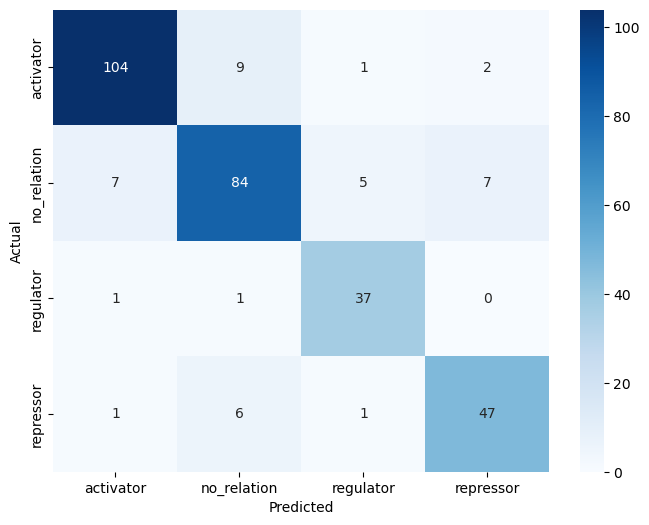

In [135]:
heatmap_data = conf_mat_data.pivot_table(index='Actual', columns='Predicted', values='nPredictions', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('../results/computers_in_biology_paper/luke_best_model/luke_best_model_confusion_matrix_during_evaluation_heatmap.jpg', format='jpeg', dpi=300)
plt.show()